#### Видеокурс по теории вероятностей и математической статистике (20 ноября - 30 декабря)
Домашнее задание
*Урок 2

#### Задачи 1 и 2
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.



Вероятность ответить правильно на любой вопрос $$р=1/4$$

Посчитаем вероятность каждого значения:
$$P(X = 0) = C_n^k p^k (1 - p)^{n - k} $$

In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [94]:
values = np.arange(0, 6)
p=1/4 # вероятность ответа на вопрос
n=5 # колво вопросов
#k-количество правильных ответов

In [95]:
probabilities=[]
for k in np.arange(0, 6):
    probabilities.append(combinations(n, k)*(p**k)*((1-p)**(n-k)))
probabilities

[0.2373046875,
 0.3955078125,
 0.263671875,
 0.087890625,
 0.0146484375,
 0.0009765625]

In [96]:
#постройте закон распределения случайной величины X
z = pd.DataFrame({'value': values, 'probability': probabilities})
z

,value,probability
0,0,0.237305
1,1,0.395508
2,2,0.263672
3,3,0.087891
4,4,0.014648
5,5,0.000977


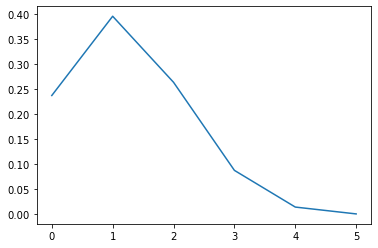

In [97]:
plt.plot(values, probabilities)
plt.show()

In [98]:
#математическое ожидание
m = (values * probabilities).sum()
print(m)

1.25


In [99]:
#ДИСПЕРЦИЯ
#определим случайную величину  𝑌=𝑋−𝑀(𝑋)
y_values = values - m
#возведём эту величину в квадрат, тем самым получим новую случайную величину  𝑍 
z_values = y_values ** 2
#дисперсия случайной величины  𝑋 
d = (z_values * probabilities).sum()
print(d)

0.9375


#### Задача 3
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [100]:
#решаем с помощью итераций
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [101]:
lambda_ = 10
sum = 0
n = -1
while (sum <= 0.95):
        n = n+1
        sum = sum + poisson_proba(k=n, lambda_=lambda_)
print("Ответ: N=", n)

Ответ: N= 15


### Задача 4
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [102]:
# Решение.
# число наступления события в ходе проведения N экспериментов, описывается формулой Бернулли.

In [115]:
p=0.01
n=6
P6=0

while (P6<0.9):
    P1to5=[]
    for k in range(0,6):        
        P1to5.append(combinations(n,k) * (p**k) * ((1-p)**(n-k)))
    arr = np.array(P1to5)    
    P6 = 1 - arr.sum()    
    n = n + 1
print(f"колво выстрелов = {n-1} при вероятности в {P6}")

колво выстрелов = 926 при вероятности в 0.9003627121531355
